# Emails_multiclassification_spam

## Import des packages

In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import re
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
sys.path.insert(0, '/home/felix/code/mlerend/thetidinbox_1004/thetidinbox_1004')

## Import des emails

In [65]:
emails_df = pd.DataFrame({"message" : [],
                         "categorie" : []})
for i in range(1,9):
    path_data = f'../../raw_data/enron/emails/txt_files_categories/all_txt_files{i}.txt'
    with open(path_data) as f:
        contents = f.read()
    emails_cat = [email for email in contents.split("Message-ID: ") if email]
    emails_df = pd.concat([emails_df, pd.DataFrame({"message" : emails_cat,
                         "categorie" : int(i)})])

## Data exploration

In [83]:
num_email_per_cat = emails_df["categorie"].value_counts().sort_index()
weight_email_per_cat = emails_df["categorie"].value_counts(normalize=True).sort_index()
num_mail_df = pd.DataFrame({"number of emails" : num_email_per_cat.values,
             "% of total" : round(weight_email_per_cat,2)}, index = num_email_per_cat.index)
num_mail_df.loc["Total"] = num_mail_df.sum()
num_mail_df

,number of emails,% of total
1.0,839.0,0.49
2.0,38.0,0.02
3.0,102.0,0.06
4.0,480.0,0.28
5.0,74.0,0.04
6.0,144.0,0.08
7.0,21.0,0.01
8.0,18.0,0.01
Total,1716.0,0.99


In [88]:
avg_length = int(emails_df["message"].apply(lambda x : len(x)).mean())
print(f"Le nombre moyen de mots par email est de {avg_length}")

Le nombre moyen de mots par email est de 7369


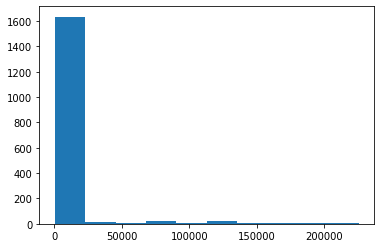

In [98]:
plt.hist(emails_df["message"].apply(lambda x : len(x)));

## Data cleaning

In [3]:
def clean_email(email):

    # Remove mentions
    email = re.sub(r'@\w+', '', email)
    # Remove urls
    email = re.sub(r'http\S+', ' ', email)
    # Remove digits
    email = re.sub("\d+", " ", email)
    # Remove backline character
    email = email.replace('\n', ' ')
    # Remove digits between brackets
    email = re.sub(r'<.*>', '', email)
    # Remove punctuations
    email = email.translate(str.maketrans("", "", punctuation))
    email = email.lower()
    
    return email

In [132]:
emails_df['message'] = emails_df['message'].apply(clean_email)
emails_df.sample(1)["message"].values

array([' date mon   jul         pdt from stevenkeancom to rosaleeflemingcom jeffskillingcom subject jeff skillings letter from tom delay re rnsec mimeversion    contenttype textplain charsetusascii contenttransferencoding  bit xfrom steven j kean xto rosalee fleming jeff skilling xcc  xbcc  xfolder stevenkeandec  notes foldersall documents xorigin keans xfilename skeannsf  sherrie and rosie  jeff and ken both received notes from tom delay about  designating portions of their contributions for use  in texas  mr delay  would like them to make that designation using the letter below note that it  will need to be modified to be from each individually rather than a joint  letter  it is of course up to ken and jeff whether to make the  designation  forwarded by steven j keanhouees on         pm   cynthia sandherr        pm   to steven j keanhouees cc elizabeth linnellhouees carolyn cooneycorpenron joe  hillingscorpenron  subject jeff skillings letter from tom delay re rnsec  steve  per your 

# Emails_multiclassification_Enron

In [60]:
emails_df_m = pd.read_csv("../Marine/cleaned_emails.csv")
emails_df_m_cleaned = emails_df_m.copy()

## Cleaning

In [61]:
emails_df_m_cleaned = emails_df_m_cleaned.loc[emails_df_m["MessContents"].notna()]

emails_df_m_cleaned["MessContents"] = emails_df_m_cleaned["MessContents"].apply(clean_email)

## Stopwords removal

Removing English stopwords

In [62]:
def stopword_removal(email):

    stop_words = set(stopwords.words('english')) 

    email = email.split()
    filtered_sentence = ""

    for w in email: 
        if w not in stop_words: 
            filtered_sentence = filtered_sentence + w +" "

    return filtered_sentence

In [63]:
emails_df_m_cleaned['MessContents'] = emails_df_m_cleaned['MessContents'].apply(stopword_removal)

## Tokenizing

Transforming string into a list of words

In [64]:
emails_df_m_cleaned['MessContents'] = emails_df_m_cleaned['MessContents'].apply(word_tokenize)

## Lemmatizing

In [65]:
def lemmatizing(email):
    
    # 1 - Lemmating the verbs
    verb_lemmatized = [                  
    WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
    for word in email   
    ]

    # 2 - Lemmatizing the nouns
    noun_lemmatized = [                 
    WordNetLemmatizer().lemmatize(word, pos = "n") # n --> nouns
    for word in verb_lemmatized
    ]
    
    return noun_lemmatized

In [66]:
emails_df_m_cleaned['MessContents'] = emails_df_m_cleaned['MessContents'].apply(lemmatizing)

## Example

In [67]:
random_email_num = random.randint(0,len(emails_df_m_cleaned))
random_email_num

316

### Before cleaning

In [68]:
emails_df_m.loc[random_email_num,"MessContents"]

'To:WILLIAMS, WILLIAMEmail:bwillia5@enron.com - 503-464-3730 Enron Wholesale Services - Office of the Chairman From:  Mark Frevert, Chairman & CEO      Mark Haedicke, Managing Director & General Counsel Subject:  Confidential Information and Securities Trading To keep pace with the fluid and fast-changing demands of our equity trading activities, Enron Wholesale Services ("EWS") has recently revised its official Policies and Procedures Regarding Confidential Information and Securities Trading ("Policies and Procedures").These revisions reflect two major developments: (1) our equity trading activities have been extended into the United Kingdom, and (2) in an effort to streamline the information flow process, the "Review Team" will play a more centralized role, so that the role of the "Resource Group" is no longer necessary.You are required to become familiar with, and to comply with, the Policies and Procedures.The newly revised Policies and Procedures are available for your review on L

### After cleaning

In [69]:
emails_df_m_cleaned.loc[random_email_num,"MessContents"]

['towilliams',
 'williamemailbwillia',
 'com',
 'enron',
 'wholesale',
 'service',
 'office',
 'chairman',
 'mark',
 'frevert',
 'chairman',
 'ceo',
 'mark',
 'haedicke',
 'manage',
 'director',
 'general',
 'counsel',
 'subject',
 'confidential',
 'information',
 'security',
 'trade',
 'keep',
 'pace',
 'fluid',
 'fastchanging',
 'demand',
 'equity',
 'trade',
 'activity',
 'enron',
 'wholesale',
 'service',
 'ew',
 'recently',
 'revise',
 'official',
 'policy',
 'procedure',
 'regard',
 'confidential',
 'information',
 'security',
 'trade',
 'policy',
 'proceduresthese',
 'revision',
 'reflect',
 'two',
 'major',
 'development',
 'equity',
 'trade',
 'activity',
 'extend',
 'unite',
 'kingdom',
 'effort',
 'streamline',
 'information',
 'flow',
 'process',
 'review',
 'team',
 'play',
 'centralize',
 'role',
 'role',
 'resource',
 'group',
 'longer',
 'necessaryyou',
 'require',
 'become',
 'familiar',
 'comply',
 'policy',
 'proceduresthe',
 'newly',
 'revise',
 'policy',
 'procedur

## Export csv